# Ejercicio: Detección de fraude
Este ejercicio tiene por objetivo poner en práctica los conceptos las técnicas de aprendizaje supervisado y en particular clasificación. El ejercicio se divide en las siguientes secciones: 
1. exploración de los datos mediante técnicas estadísticas clásicas, 
2. selección de atributos, 
3. entrenamiento de diferentes clasificadores,
4. evaluación.

# Librerías:
Importamos todas las librerías que serán utilizadas para el ejercicio.




In [1]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade --no-cache-dir gdown

# Datos:
Descargamos los datos desde google drive a la instancia de google colab.

In [2]:
!gdown --id 1bWFuwCD_elqw3_jzR1Xob1YMnu-c7HcF

/opt/anaconda3/lib/python3.8/site-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bWFuwCD_elqw3_jzR1Xob1YMnu-c7HcF
To: /Users/martavenegas/Desktop/LOYOLA/PrimerCuatri/Aprendizaje_Automatico/Clasificacion/MachineLearning_Classification/creditcard.csv
100%|████████████████████████████████████████| 150M/150M [00:07<00:00, 19.3MB/s]


In [3]:
# Ref.: https://www.kaggle.com/isaikumar/creditcardfraud/version/1
# Data frame with credit card data

# Leemos el archivo CSV
df = pd.read_csv( 'creditcard.csv' )

# 1. Análisis de los datos

1.   Visualizamos la información del dataframe de datos.
2.   Calculamos la correlación entre cada una de las variables y la clase. Cuanto más grande el valor de correlación en valor absoluto mayor es la correlación estadística entre la variable y la clase Class que contiene si la transacción es fraudulenta o legítima.


In [4]:
# 1
# Details on data
print(df.shape)
print(df.columns)

# 2
# Compute correlation of features with respect to Class
# By default uses Pearson correlation that estimates linear correlation: 
# +1 or -1 linearly correlated, 0 non linear correlated
df.corr()["Class"].sort_values(key=abs,ascending=False)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Class     1.000000
V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V11       0.154876
V4        0.133447
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V2        0.091289
V6       -0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time     -0.012323
V28       0.009536
V24      -0.007221
Amount    0.005632
V13      -0.004570
V26       0.004455
V15      -0.004223
V25       0.003308
V23      -0.002685
V22       0.000805
Name: Class, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

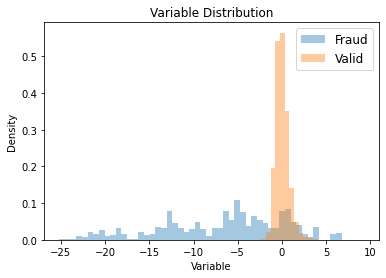

In [5]:
df_0 = df[ df['Class']==0 ]
df_1 = df[ df['Class']==1 ]

sns.distplot(df_1['V17'],  kde=False, label='Fraud', norm_hist=True, bins=50)
sns.distplot(df_0['V17'],  kde=False, label='Valid', norm_hist=True, bins=50)

plt.legend(prop={'size': 12})
plt.title('Variable Distribution')
plt.xlabel('Variable')
plt.ylabel('Density')

<AxesSubplot:xlabel='V23', ylabel='V22'>

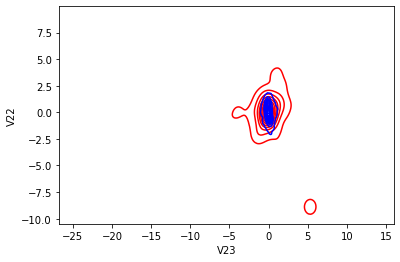

In [6]:
sns.kdeplot(data=df_1, x="V23", y="V22", color="red")
sns.kdeplot(data=df_0.sample(frac=0.1), x="V23", y="V22", color="blue") 

# 2. Selección de atributos
1. Seleccionamos los atributos (características) a ser utilizadas. Dentro de los atributos $X$ no debe estar la clase $Class$.
2. Verificamos la cantidad de muestras de cada clase.

In [67]:
# 1
# Extract features and labels

#
# Obs. Modify the following code to select set of features
#
# The following line allows to select some variables to be used
X = df.loc[:,['V17','V14','V12','V7','V10','Amount']]

# Class is the target to predict (classify)
y = df.Class

# 2
# Number of samples per class
unique, counts = np.unique(y, return_counts=True)
for i in range(0,len(unique)):
  print('Class %i: Samples %i' % (unique[i], counts[i]) )

# Number of attributes
print('Number of attributes: %i' % (X.shape)[1])

Class 0: Samples 284315
Class 1: Samples 492
Number of attributes: 6


# 3. Entrenamiento del clasificador

1. El conjunto de datos se separa en entrenamiento y test.
2. Se selecciona y entrena un clasificador.
3. Métricas de performance



In [76]:
# Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# 1
# Split train and test 
# stratify=y means the same % of classes is present in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

# 2
#
# Selection of classifier
#
#clf = KNeighborsClassifier(n_neighbors=3)
#clf = DecisionTreeClassifier()
#clf = LogisticRegression(solver='lbfgs',max_iter=500)
#clf = GaussianNB()

# Configuration of the neural network
#
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
#
# alpha: Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.
# hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.

clf = MLPClassifier(solver='sgd', # stochastic gradient descent, SGD
                    alpha=0.05, # Penaliza SC pesos
                    hidden_layer_sizes=(100, 50, 30), # Redes ocultas
                    random_state=1, # Num aleatorio para los pesos y el sesgo iniciales
                    max_iter = 50) #Para la red si no mejoro las métricas en la validación

# Train classifier
clf.fit(X_train.values,y_train.values)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.05, hidden_layer_sizes=(100, 50, 30), max_iter=50,
              random_state=1, solver='sgd')

In [77]:
#print(clf.best_params_)
#from sklearn.model_selection import GridSearchCV             
#param_grid = {
#    'hidden_layer_sizes': [(150,100,50), (100,50,30)],
#    'max_iter': [50, 100],
#    'alpha': [0.0001, 0.05]
#}

#clf = GridSearchCV(MLPClassifier(early_stopping=True), param_grid, n_jobs=-1)
# Train classifier
#clf.fit(X_train.values,y_train.values)

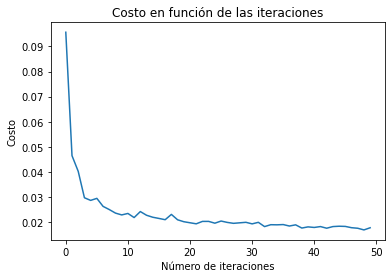

In [78]:
# Loss Curve
plt.plot(clf.loss_curve_)
plt.title('Costo en función de las iteraciones')
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo')
plt.show()

# 4. Evaluación

In [79]:
# 3
# Confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['1', '0']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (Fraud) %s: ' % report['0'])
print('Class 1 (Valid) %s: ' % report['1'])

# Amount of fraud detected
a = X_test.Amount
# TP 
ind = (y_pred == 1) & (y_test == 1)
# Amount for TP
amount_detected = np.sum( a[ ind ] ) 
# Total amount of fraud
ind = (y_test == 1)
amount_total = np.sum( a[ ind ] ) 

print('\n Amount ------------------ \n Detected = %f, Total = %f, Percentage = %f' % (amount_detected, amount_total, (amount_detected/amount_total)*100))

 Confusion matrix ------------------
[[142141     17]
 [   132    114]]

 % Corr ----------------------------
99.89536810763742

 Classification report ------------------
Class 0 (Fraud) {'precision': 0.8702290076335878, 'recall': 0.4634146341463415, 'f1-score': 0.6047745358090185, 'support': 246}: 
Class 1 (Valid) {'precision': 0.9990722062513618, 'recall': 0.9998804147497854, 'f1-score': 0.999476147114766, 'support': 142158}: 

 Amount ------------------ 
 Detected = 2009.620000, Total = 30229.360000, Percentage = 6.647908


| Features | Target | Model | Hyperparam. | Acc. | F1 Score| Precision | Recall | % Fr detectado(recal para fraude) | FP | FN | % monto Fraude|
---------- | ------ | ----- | ----------- | ---- | ------- | --------- | ------ | --------------------------------- | -- | -- | ------ | 
| 'V17','V14','V12','V10','V16','Amount' | Class | MLPC  |  sgd, 12 layers, early stopping, alpha 0.1, random_state = 1   | 99.91% | 99.53%/71% | 99.93%/83.51% | 99.97/61.78%|  61.78 % | 30 | *94* |  39.95 |
| 'V17','V14','V12','V7','V10','V4','V3','Amount' | Class | MLPC  |  sgd, 16 layers, early stopping, alpha 0.1, random_state = 1   | 99.92% | 99.96%/73.54% | 99.93%/86.74% | 99.98/63.82%|  63.82% | 24 | *89* |  43.72 |



Amount:

Detected = 12077.980000, Total = 30229.360000, Percentage = 39.954468
Detected = 13217.220000, Total = 30229.360000, Percentage = 43.723122